# Tratammiento de variables 

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [45]:
cartera = pd.read_csv('preprocesado.csv')

In [46]:
cartera = cartera.drop('Unnamed: 0', axis=1)

In [47]:
cartera.columns

Index(['POL', 'EDAD', 'SEX', 'DUR_ANOS', 'ANTIGÜEDAD', 'Ano_VTO', 'PU',
       'PM_(FONDO)', 'DIFF', 'RESCATE', 'AGE_AT_ENTRY', 'PREM_PAYBL_M',
       'ENTRY_MONTH', 'G_FUND_PC', 'PREM_FREQ'],
      dtype='object')

# Information value of the variables

In [48]:
import scorecardpy as sc
iv = sc.iv(cartera,  y="RESCATE")

# Reducir la precisión a 2 decimales y mostrar el resultado
pd.set_option("display.precision", 2)
print(iv)

        variable  info_value
6           EDAD        4.92
13       Ano_VTO        4.25
3   AGE_AT_ENTRY        2.25
1   PREM_PAYBL_M        1.91
10      DUR_ANOS        1.91
11          DIFF        1.66
12     PREM_FREQ        1.11
5             PU        1.09
8            POL        1.05
9     PM_(FONDO)        0.96
4      G_FUND_PC        0.55
2     ANTIGÜEDAD        0.06
0            SEX        0.04
7    ENTRY_MONTH        0.01


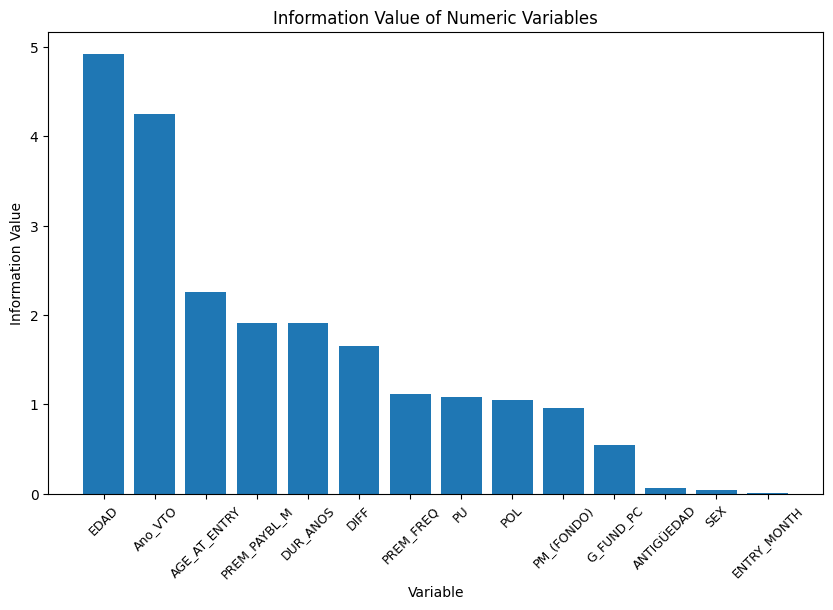

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(iv["variable"], iv["info_value"])
ax.set_xlabel("Variable")
ax.set_ylabel("Information Value")
ax.set_title("Information Value of Numeric Variables")
plt.xticks(rotation=45, fontsize=9)
plt.show()

In [50]:
cartera.dtypes

POL              object
EDAD              int64
SEX              object
DUR_ANOS          int64
ANTIGÜEDAD        int64
Ano_VTO           int64
PU              float64
PM_(FONDO)      float64
DIFF            float64
RESCATE           int64
AGE_AT_ENTRY      int64
PREM_PAYBL_M      int64
ENTRY_MONTH       int64
G_FUND_PC       float64
PREM_FREQ        object
dtype: object

In [51]:

# def apply_binning_to_variables(df, variables, target, method='tree', bin_num_limit=6):
#     # Resultados de binning almacenados en un diccionario
#     binning_results = {}
    
#     for var in variables:
#         aux = df.loc[:, [target, var]]
#         aux.reset_index(inplace=True, drop=True)
        
#         # Convertir la columna a un tipo de datos adecuado
#         aux[var] = pd.to_numeric(aux[var], errors='coerce')
#         aux = aux.dropna(subset=[target, var])  # Eliminar filas con NaN
        
#         # Aplicar binning óptimo
#         binning = sc.woebin(aux, y=target, method=method, bin_num_limit=bin_num_limit)
        
#         # Almacenar y imprimir los resultados
#         binning_results[var] = binning[var]  # Guarda el DataFrame directamente
#         print(f"Binning results for {var}:")
#         print(binning[var].head())  # Muestra las primeras filas del DataFrame para revisión
    
#     return binning_results

# # Lista de variables para aplicar binning
# variables_to_bin = [ 'EDAD', 'Ano_VTO']

# # Aplicar la función a tu dataset
# binning_results = apply_binning_to_variables(cartera, variables_to_bin, 'RESCATE')


[INFO] creating woe binning ...


C:\Users\mbuendiarascon\AppData\Roaming\Python\Python312\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\mbuendiarascon\AppData\Roaming\Python\Python312\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\mbuendiarascon\AppData\Roaming\Python\Python312\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=Fals

Binning results for EDAD:
  variable          bin  count  count_distr   good  bad   badprob   woe  \
0     EDAD  [-inf,51.0)  52998         0.59  52994    4  7.55e-05 -4.87   
1     EDAD  [51.0,54.0)  12301         0.14  12264   37  3.01e-03 -1.18   
2     EDAD  [54.0,59.0)  14886         0.16  14787   99  6.65e-03 -0.38   
3     EDAD   [59.0,inf)  10275         0.11   9536  739  7.19e-02  2.07   

   bin_iv  total_iv breaks  is_special_values  
0    2.86      4.51   51.0              False  
1    0.11      4.51   54.0              False  
2    0.02      4.51   59.0              False  
3    1.52      4.51    inf              False  
[INFO] creating woe binning ...


C:\Users\mbuendiarascon\AppData\Roaming\Python\Python312\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\mbuendiarascon\AppData\Roaming\Python\Python312\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\mbuendiarascon\AppData\Roaming\Python\Python312\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=Fals

Binning results for Ano_VTO:
  variable              bin  count  count_distr   good  bad   badprob   woe  \
0  Ano_VTO    [-inf,2027.0)   6404         0.07   5874  530  8.28e-02  2.22   
1  Ano_VTO  [2027.0,2029.0)   4584         0.05   4375  209  4.56e-02  1.58   
2  Ano_VTO  [2029.0,2040.0)  42489         0.47  42352  137  3.22e-03 -1.11   
3  Ano_VTO     [2040.0,inf)  36983         0.41  36980    3  8.11e-05 -4.80   

   bin_iv  total_iv  breaks  is_special_values  
0    1.19      3.81  2027.0              False  
1    0.30      3.81  2029.0              False  
2    0.35      3.81  2040.0              False  
3    1.96      3.81     inf              False  


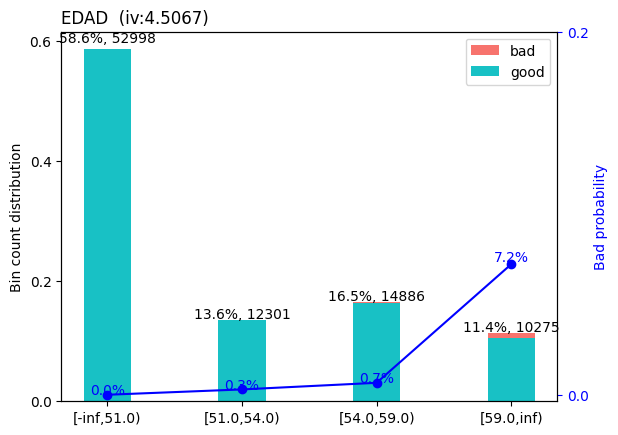

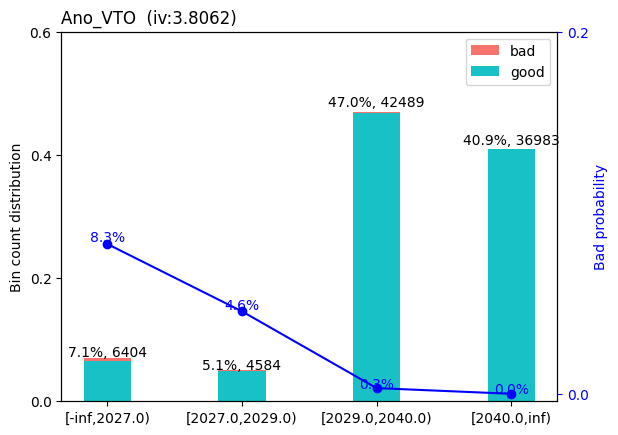

In [52]:
def apply_binning_to_variables(df, variables, target, method='tree', bin_num_limit=6):
    binning_results = {}
    
    for var in variables:
        aux = df.loc[:, [target, var]]
        aux.reset_index(inplace=True, drop=True)
        aux[var] = pd.to_numeric(aux[var], errors='coerce')
        aux = aux.dropna(subset=[target, var])  # Remove NaNs
        
        binning = sc.woebin(aux, y=target, method=method, bin_num_limit=bin_num_limit)
        binning_results[var] = binning[var]
        
        # Print and plot the results
        print(f"Binning results for {var}:")
        print(binning[var])
        
        # Plotting WoE for each bin
        sc.woebin_plot(binning[var])
    
    return binning_results

# Apply function to your dataset
binning_results = apply_binning_to_variables(cartera, ['EDAD', 'Ano_VTO'], 'RESCATE')

Los resultados del binning añadirlos a el dataset original con los valores de las Woes

In [53]:
cartera_binned = sc.woebin_ply(cartera, binning_results)

# Display the head of the new DataFrame with binned variables
print(cartera_binned.head())

[INFO] converting into woe values ...
      SEX  PREM_PAYBL_M  RESCATE  ANTIGÜEDAD  AGE_AT_ENTRY  G_FUND_PC      PU  \
0    Male           300        0          20            39   1.09e-02   900.0   
1  Female           264        0          20            42   1.20e-02  1560.0   
2  Female           288        0          20            41   1.14e-02  1440.0   
3  Female           300        0          20            39   1.10e-02   750.0   
4  Female           360        0          20            35   9.90e-03   630.0   

   ENTRY_MONTH                POL  PM_(FONDO)  DUR_ANOS      DIFF  \
0            9   445050048961226N     1648.11        25  2.00e-03   
1            9   445050048953139K     2879.29        22  2.00e-03   
2            9    44505004802368J     2659.41        24  2.00e-03   
3            9  4450500413107960F     1385.51        25  2.00e-03   
4            9  4450500411806630V     1165.46        30  2.00e-03   

       PREM_FREQ  Ano_VTO_woe  EDAD_woe  
0          Other  

In [54]:
cartera_binned.to_csv('binned_variables.csv')

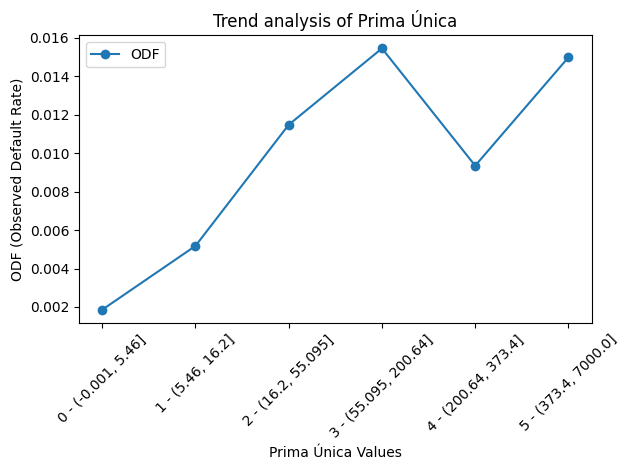

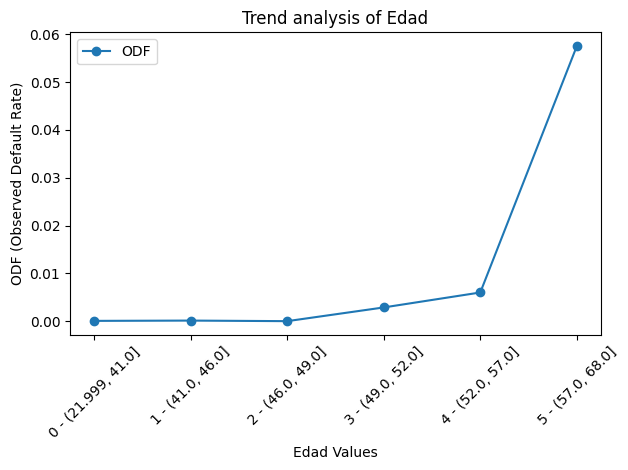

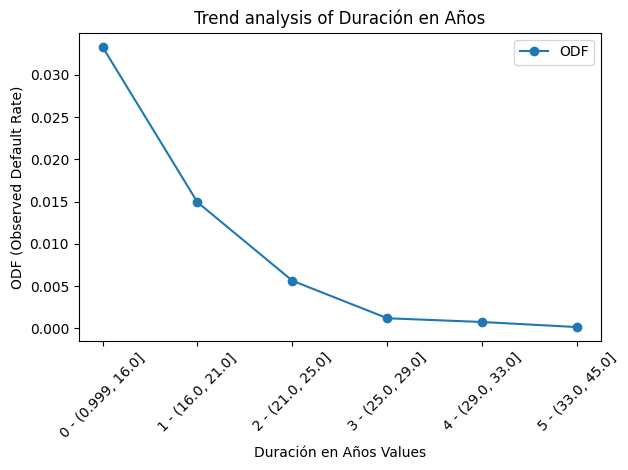

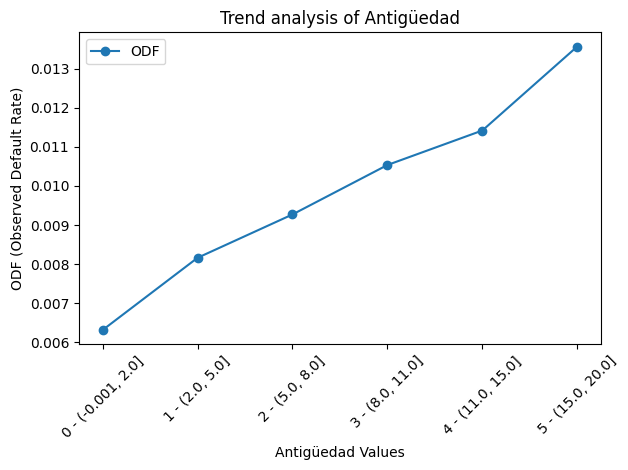

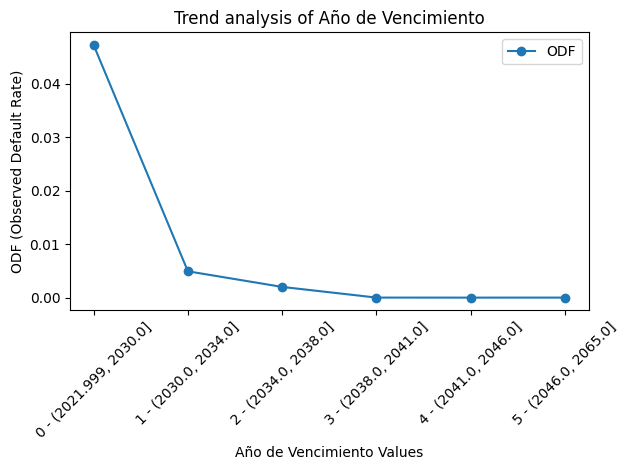

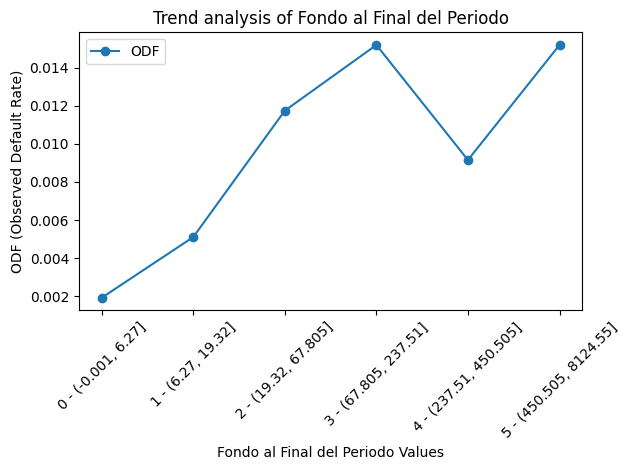

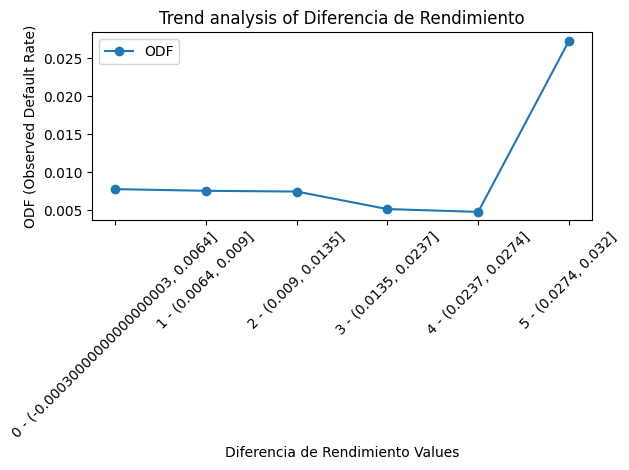

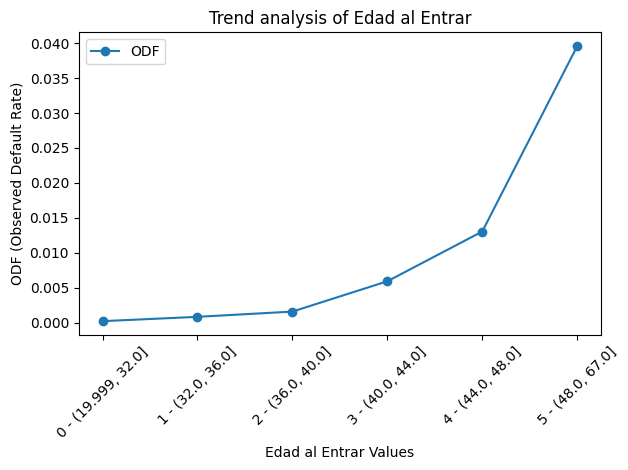

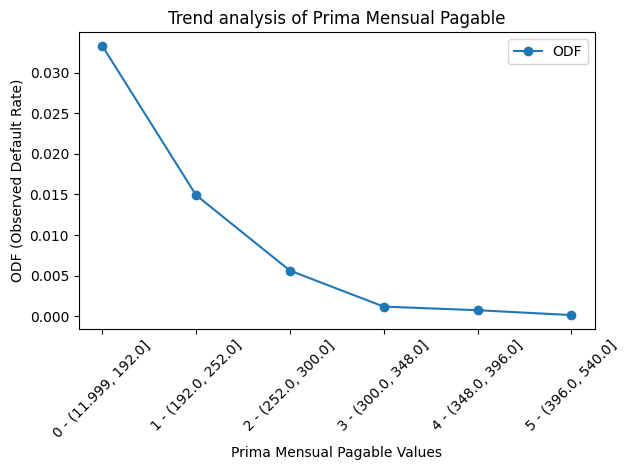

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def trends(train, variable, label):
    temp = cartera[[variable, 'RESCATE']].copy()
    
    temp['RESCATE'] = pd.to_numeric(temp['RESCATE'], errors='coerce')
    temp = temp.dropna(subset=[variable, 'RESCATE'])  # Elimina filas con NaN

    # Detección del tipo de datos para aplicar binning adecuado
    if np.issubdtype(temp[variable].dtype, np.number):
        temp["quartile"] = pd.qcut(temp[variable], 6, labels=False, duplicates="drop")
        temp["quartileBounds"] = pd.qcut(temp[variable], 6, duplicates="drop")
        temp["Interval"] = temp["quartile"].astype(str) + " - " + temp["quartileBounds"].astype(str)
        results = temp.groupby("Interval").agg({'RESCATE': ['count', 'sum', 'mean']})
        results.columns = ['N', 'Defaults', 'ODF']
    else:
        results = temp.groupby(variable).agg({'RESCATE': ['count', 'sum', 'mean']})
        results.columns = ['N', 'Defaults', 'ODF']
    # Gráfico de las tendencias
    plt.plot(results.index, results['ODF'], marker='o', label='ODF')
    plt.title(f"Trend analysis of {label}")
    plt.xlabel(f"{label} Values")
    plt.ylabel("ODF (Observed Default Rate)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
# Ejemplo de uso de la función

# Análisis de tendencias para 'PU'
trends(cartera, "PU", "Prima Única")

# Análisis de tendencias para 'EDAD'
trends(cartera, "EDAD", "Edad")

# Análisis de tendencias para 'DUR_ANOS'
trends(cartera, "DUR_ANOS", "Duración en Años")

# Análisis de tendencias para 'ANTIGUEDAD'
trends(cartera, "ANTIGÜEDAD", "Antigüedad")

# Análisis de tendencias para 'Año_VTO'
trends(cartera, "Ano_VTO", "Año de Vencimiento")

# Análisis de tendencias para 'PM_(FONDO)'
trends(cartera, "PM_(FONDO)", "Fondo al Final del Periodo")

# Análisis de tendencias para 'Diff.'
trends(cartera, "DIFF", "Diferencia de Rendimiento")

# Análisis de tendencias para 'ENTRY_YEAR'
# trends(cartera, "ENTRY_MONTH", "Mes de Entrada")

# Análisis de tendencias para 'AGE_AT_ENTRY'
trends(cartera, "AGE_AT_ENTRY", "Edad al Entrar")

# Análisis de tendencias para 'PREM_PAYBL_M'
trends(cartera, "PREM_PAYBL_M", "Prima Mensual Pagable")



## Promedio global de la variable target 

In [59]:
# tasa_de_unos = cartera['RESCATE'].mean()
# tasa_de_unos

In [60]:
# min_age = cartera['EDAD'].min()
# max_age = cartera['EDAD'].max()

# min_age, max_age

In [61]:
# bins = np.arange(30, 70, 5)  # Bins de 30 a 65 en incrementos de 5 años
# cartera['edad_bin'] = pd.cut(cartera['EDAD'], bins, right=False)

# # Agrupar los datos por los bins de edad y calcular el total de eventos por bin
# grouped_data = cartera.groupby('edad_bin').agg(
#     total=('EDAD', 'count'),  # Contar el número de registros por bin
#     PM_FONDO_mean=('PM_(FONDO)', 'mean')  # Calcular la media de PM_FONDO por bin para usar como ejemplo de análisis
# )

# # Calcular el punto medio del intervalo para cada bin
# grouped_data['medio_intervalo'] = [interval.mid for interval in grouped_data.index.categories]

# grouped_data.reset_index(inplace=True)
# grouped_data

In [62]:
# def my_plot_binary(df_myplot, col, max_value, baseline):
#     fig, ax1 = plt.subplots()
    
#     # Barra para total de eventos en cada bin
#     bar_width = 4.0  # Ancho arbitrario para las barras
#     ax1.bar(df_myplot['medio_intervalo'], df_myplot['total'], bar_width, color='steelblue', edgecolor='black')
    
#     ax1.set_ylabel('Cantidad de eventos en el bin', fontsize=14)
#     ax1.set_xlabel('EDAD', fontsize=14)
#     ax1.set_title('Distribución de eventos por grupo de edad y Tasa de Unos', fontsize=16)

#     # Crear un eje adicional para la tasa de unos
#     ax2 = ax1.twinx() 
#     ax2.axhline(baseline, linestyle='--', color='red', label=f'Tasa de Unos General: {baseline:.2%}')
#     ax2.set_ylabel('Tasa de Unos', fontsize=14)
#     ax2.set_ylim(0, 1.1)
#     ax2.legend()

#     plt.xticks(df_myplot['medio_intervalo'], labels=[f"{int(interval.left)}-{int(interval.right)}" for interval in df_myplot['edad_bin']])
#     plt.show()

# # Usar la función modificada para graficar los datos
# my_plot_binary(grouped_data, 'EDAD', max_age, tasa_de_unos)

In [63]:
# from optbinning import OptimalBinning
# import matplotlib.pyplot as plt

In [64]:
# data = cartera.copy(deep=True)
# show_plot = True
# show_table = True
# numerical_cols_no_groups = []
# numericas_excel = pd.DataFrame()

In [65]:
# target1 = cartera['RESCATE']
# 

In [66]:
# numerical_columns = cartera.select_dtypes(include=['int64', 'float64'])
# # numerical_columns
# target1 = 'RESCATE'

In [67]:
# numerical_columns = [col for col in cartera.columns if col not in ['RESCATE', 'ENTRY_MONTH','SEX' ]]

In [68]:

# def calculate_woe_iv(dataset, feature, target):
#     """
#     Calculate bins, counts of 1s and 0s, Weight of Evidence (WoE), Information Value (IV), and event rates,
#     and include the variable name in the output.
    
#     Parameters:
#     - dataset (pd.DataFrame): The DataFrame containing the data.
#     - feature (str): The feature column to calculate WoE and IV for.
#     - target (str): The target column.
    
#     Returns:
#     - pd.DataFrame: A DataFrame with the binning results including WoE, IV, and event rates, tagged with the variable name.
#     """
#     try:
#         bins = pd.qcut(dataset[feature].dropna(), q=10, duplicates='drop', retbins=True)
#         dataset['bin'] = bins[0]  # The binned data
#         bin_edges = bins[1]  # The edges of each bin
#     except ValueError as e:
#         print(f"ValueError: {str(e)} - Possibly due to insufficient unique values in {feature}.")
#         return pd.DataFrame()
#     except Exception as e:
#         print(f"Unexpected error: {str(e)}")
#         return pd.DataFrame()

#     grouped = dataset.groupby('bin')[target].agg(['count', 'sum'])
#     grouped['non_events'] = grouped['count'] - grouped['sum']
#     grouped['event_rate'] = grouped['sum'] / grouped['count']
#     grouped['WoE'] = np.log((grouped['sum'] / grouped['sum'].sum()) / (grouped['non_events'] / grouped['non_events'].sum())).replace([-np.inf, np.inf], 0)
#     grouped['IV'] = (grouped['sum'] / grouped['sum'].sum() - grouped['non_events'] / grouped['non_events'].sum()) * grouped['WoE']

#     # Add bin edges for reference
#     grouped['bin_edges'] = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:], closed='right')

#     # Include the variable name in the DataFrame
#     grouped['variable_name'] = feature  # Adding variable name to each row of the DataFrame

#     return grouped.reset_index()


In [69]:
# list_bivariado = []
# numerical_cols_no_groups = []

# for col in numerical_columns:
#     print(col)
#     result = calculate_woe_iv(data, col, target1)
    
#     if len(result) > 0:
#         print(f"{col} ... Generating {len(result)} groups.")
#         fig, ax1 = plt.subplots(figsize=(10, 5))
        
#         ax1.bar(result.index.astype(str), result['count'], color='blue', alpha=0.6, label='Total Count')
#         ax1.set_xlabel('Bins')
#         ax1.set_ylabel('Count', color='blue')
#         ax1.tick_params(axis='y', labelcolor='blue')
#         ax1.set_title(f'Event Rate and Count by Bins for {col}')
        
#         ax1.set_xticklabels(result.index.astype(str), rotation=45, ha="right")  # ha is the horizontal alignment
        
#         ax2 = ax1.twinx()
#         ax2.plot(result.index.astype(str), result['event_rate'], color='red', marker='o', linestyle='-', label='Event Rate')
#         ax2.set_ylabel('Event Rate', color='red')
#         ax2.tick_params(axis='y', labelcolor='red')

#         fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
#         plt.show()
        
#         # Append result to list_bivariado
#         list_bivariado.append(result)

#         if show_table:
#             print(result)
#     else:
#         print(f"{col} ... No groups can be found.")
#         numerical_cols_no_groups.append(col)

# # Concatenate all DataFrames in list_bivariado and save to Excel
# if list_bivariado:
#     final_binning_results = pd.concat(list_bivariado)
#     path_excel_binning = r'C:\Users\mbuendiarascon\Documents\Modelos comportamentales\python\datatos binarizados\tablon_resultados_binning.xlsx'
#     final_binning_results.to_excel(path_excel_binning, index=False)

In [70]:
# import pickle
# binning_data = pd.read_excel(path_excel_binning)
# binning_data

In [71]:

# # Process segment data for easier mapping
# binning_data['bin_new'] = binning_data['bin'].apply(
#     lambda x: x.replace('\n', '').replace("' '", ";")[1:-1].replace("'", "").split(";")
# )
# binning_data

: 